In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from bilinear_model_single_cells import *
plt.rcParams['font.size'] = 16

In [2]:
reader=csv.reader(open("ContactSubgraphMatrix.csv", "r"), delimiter=",")
ta=list(reader)
ta=np.array(ta).astype("int") # contact matrix
reader=csv.reader(open("GapJunctContact.csv", "r"), delimiter=",")
tb=list(reader)
tb=np.array(tb).astype("double") # connectivity matrix
reader=csv.reader(open("INXExpressionJustContact.csv", "r"), delimiter=",")
tx=list(reader)
tx=np.array(tx).astype("double") #connexin expression matrix

W = ta
Z = tb
X = Y = tx

In [3]:
A_est = np.load('A_est.npy')
B_est = np.load('B_est.npy')

In [4]:
ABT = A_est.dot(B_est.T)

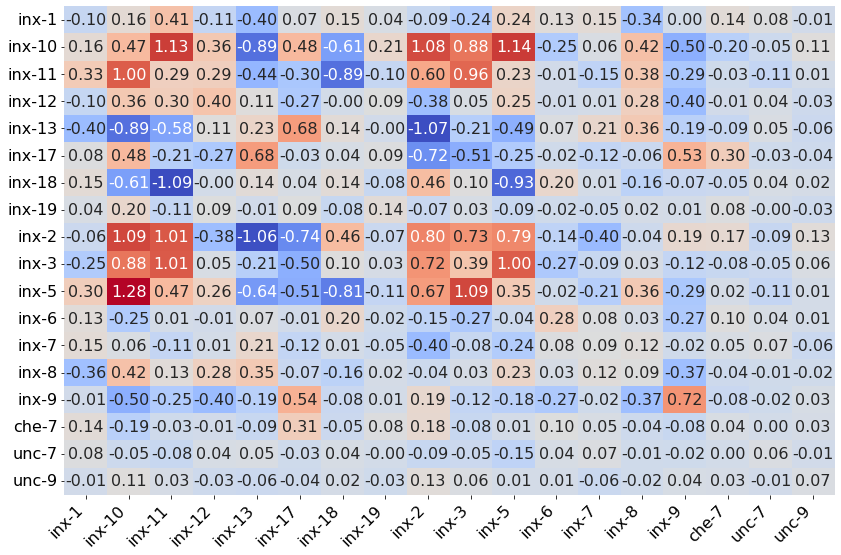

In [5]:
# Labels for the heatmap
labels = [
    "inx-1", "inx-10", "inx-11", "inx-12", "inx-13", "inx-17",
    "inx-18", "inx-19", "inx-2", "inx-3", "inx-5", "inx-6",
    "inx-7", "inx-8", "inx-9", "che-7", "unc-7", "unc-9"
]

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(ABT, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, xticklabels=labels, yticklabels=labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('figure3_bilinear_matrix.svg', format='svg', bbox_inches='tight')

In [6]:
reader=csv.reader(open("rule_matrix_0.2150.csv", "r"), delimiter=",")
tof=list(reader)
tof=np.array(tof).astype("double") # operator O from connectome model

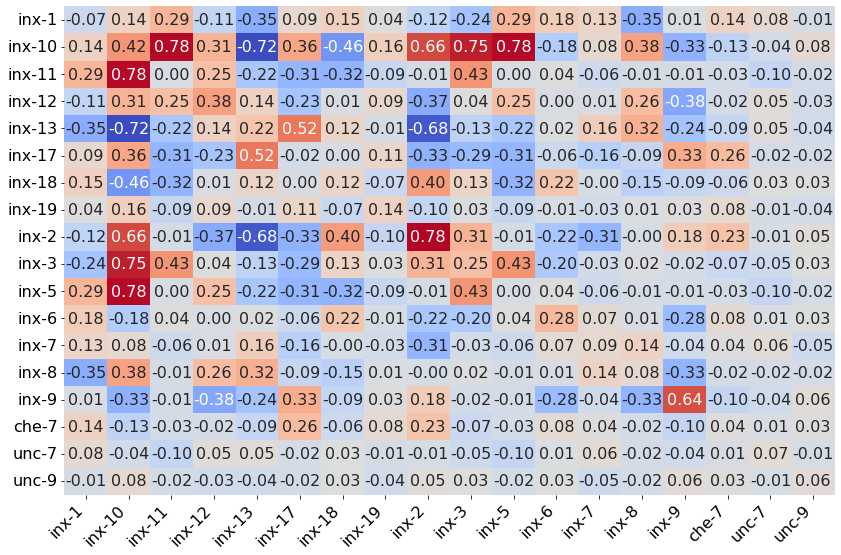

In [7]:
# Labels for the heatmap
labels = [
    "inx-1", "inx-10", "inx-11", "inx-12", "inx-13", "inx-17",
    "inx-18", "inx-19", "inx-2", "inx-3", "inx-5", "inx-6",
    "inx-7", "inx-8", "inx-9", "che-7", "unc-7", "unc-9"
]

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(tof, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, xticklabels=labels, yticklabels=labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('figure3_scm_matrix.svg', format='svg', bbox_inches='tight')

In [8]:
diff = abs(ABT - tof)/(abs(ABT) + abs(tof))

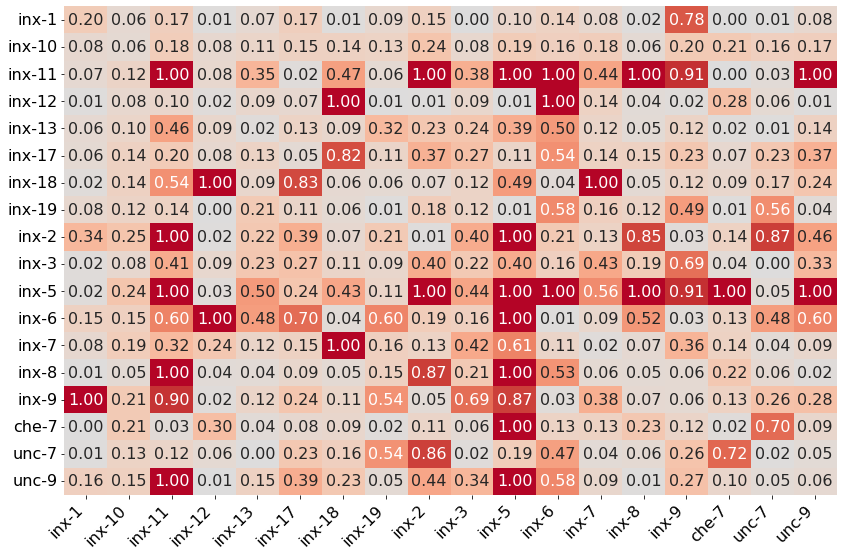

In [9]:
# Labels for the heatmap
labels = [
    "inx-1", "inx-10", "inx-11", "inx-12", "inx-13", "inx-17",
    "inx-18", "inx-19", "inx-2", "inx-3", "inx-5", "inx-6",
    "inx-7", "inx-8", "inx-9", "che-7", "unc-7", "unc-9"
]

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(diff, annot=True, fmt=".2f", cmap='coolwarm', center = 0.0, cbar=False, xticklabels=labels, yticklabels=labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('figure3_diff.svg', format='svg', bbox_inches='tight')

In [10]:
diff[diff < 0.5] = np.nan
diff[diff > 0.5] = 1.0
diff[(np.abs(tof) < 0.1) & (np.abs(ABT) < 0.1)] = np.nan

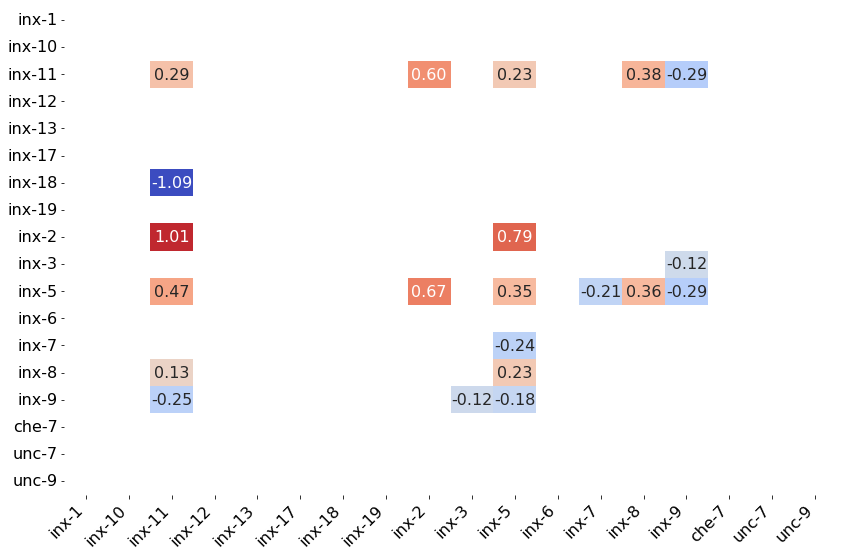

In [11]:
# Labels for the heatmap
labels = [
    "inx-1", "inx-10", "inx-11", "inx-12", "inx-13", "inx-17",
    "inx-18", "inx-19", "inx-2", "inx-3", "inx-5", "inx-6",
    "inx-7", "inx-8", "inx-9", "che-7", "unc-7", "unc-9"
]

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(ABT*diff, annot=True, fmt=".2f", cmap='coolwarm', center = 0.0, cbar=False, xticklabels=labels, yticklabels=labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('figure3_diff_ABT.svg', format='svg', bbox_inches='tight')

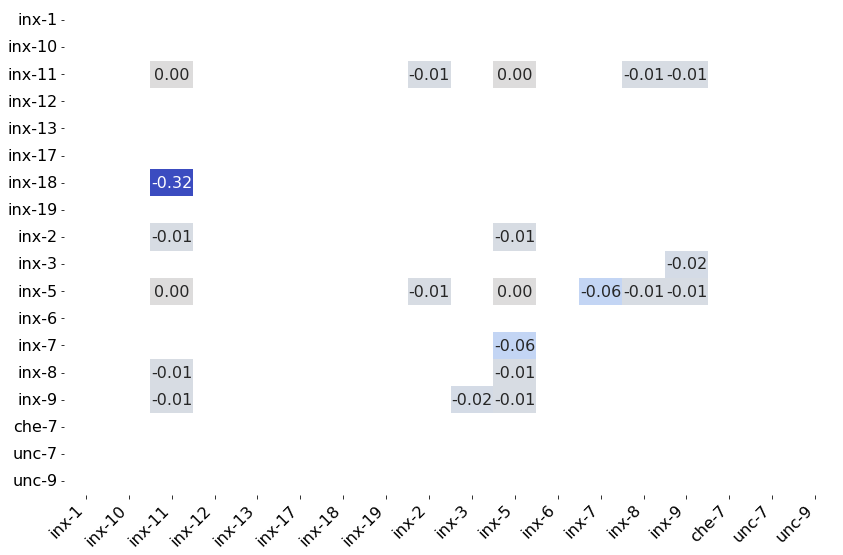

In [12]:
# Labels for the heatmap
labels = [
    "inx-1", "inx-10", "inx-11", "inx-12", "inx-13", "inx-17",
    "inx-18", "inx-19", "inx-2", "inx-3", "inx-5", "inx-6",
    "inx-7", "inx-8", "inx-9", "che-7", "unc-7", "unc-9"
]

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(tof*diff, annot=True, fmt=".2f", cmap='coolwarm', center = 0.0, cbar=False, xticklabels=labels, yticklabels=labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('figure3_diff_tof.svg', format='svg', bbox_inches='tight')